# 04_linear_algebra

In [1]:
from __future__ import division
import math
import matplotlib.pyplot as plt
from IPython.display import Image

# Vectors

### vector_add

In [2]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    
    print 'vector_add'
    print 'v', v
    print 'w', w
    
    return [v_i + w_i for v_i, w_i in zip(v, w)]

vector_add([1,2], [2, 1])

vector_add
v [1, 2]
w [2, 1]


[3, 3]

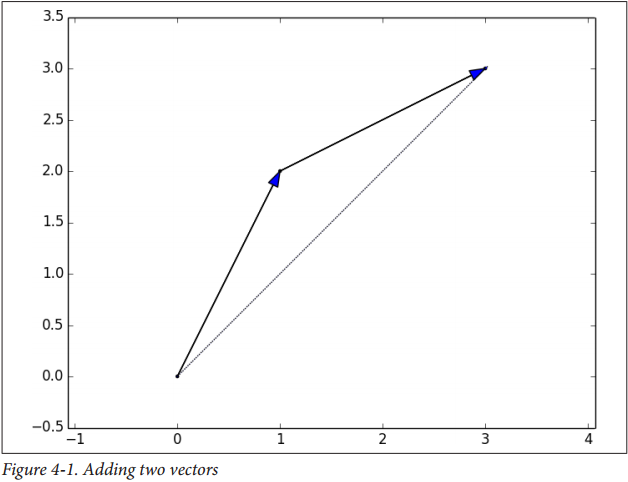

In [3]:
Image('img/C04_001.png', width=400)

### vector_subtract

In [4]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    
    print 'vector_subtract'
    print 'v', v
    print 'w', w
    
    return [v_i - w_i for v_i, w_i in zip(v,w)]

vector_subtract([1,2,3], [1,1,1])

vector_subtract
v [1, 2, 3]
w [1, 1, 1]


[0, 1, 2]

### vector_sum: method1

In [5]:
def vector_sum(vectors):
    """Sums all corresponding elements"""
    result = vectors[0]
    for vect in vectors[1:]:
        result = vector_add(result, vect)
    return result
    
vector_sum([[1,2], [2, 1], [1, 1]])

vector_add
v [1, 2]
w [2, 1]
vector_add
v [3, 3]
w [1, 1]


[4, 4]

### vector_sum: method2

In [6]:
def vector_sum(vectors):
    
    print 'vector_sum'
    
    return reduce(vector_add, vectors)

vector_sum([[1,2], [2, 1], [1, 1]])

vector_sum
vector_add
v [1, 2]
w [2, 1]
vector_add
v [3, 3]
w [1, 1]


[4, 4]

### reduce()
Apply a function of two arguments cumulatively to the items of a sequence, from left to right, so as to reduce the sequence to a single value.
For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items of the sequence in the calculation, and serves as a default when the sequence is empty.

In [7]:
reduce(lambda x, y: x+y, range(0,10))

45

### scalar_multiply

[Khanacademy multiplying matrices by scalars](https://www.khanacademy.org/math/precalculus/precalc-matrices/multiplying-matrices-by-scalars/v/scalar-multiplication)

In [8]:
def scalar_multiply(c, v):
    
    print 'scalar_multiply'
    print 'c', c
    print 'v', v
    
    return [c * v_i for v_i in v]

scalar_multiply(2, [1,2,3])

scalar_multiply
c 2
v [1, 2, 3]


[2, 4, 6]

### vector_mean

In [9]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the 
    i-th elements of the input vectors"""
    
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

vector_mean([[1,2,3], [1,1,1]])

vector_sum
vector_add
v [1, 2, 3]
w [1, 1, 1]
scalar_multiply
c 0.5
v [2, 3, 4]


[1.0, 1.5, 2.0]

### dot

The dot product measures how far the vector v extends in the w direction. For example, if w = [1, 0] then dot(v, w) is just the first component of v. Another way of saying this is that it’s the length of the vector you’d get if you projected v onto w.

[Khanacademy vector dot and cross products](https://www.khanacademy.org/math/linear-algebra/vectors_and_spaces/dot_cross_products/v/vector-dot-product-and-vector-length)

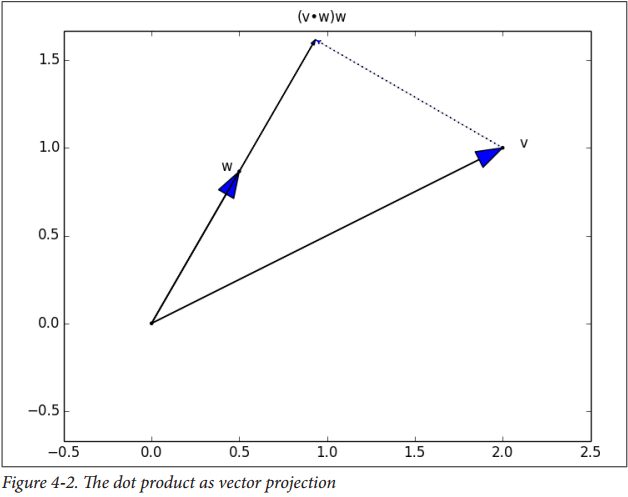

In [10]:
Image('img/C04_002.png', width=400)

The dot product tells you what amount of one vector goes in the direction of another. For instance, if you pulled a box 10 meters at an inclined angle, there is a horizontal component and a vertical component to your force vector. So the dot product in this case would give you the amount of force going in the direction of the displacement, or in the direction that the box moved. This is important because work is defined to be force multiplied by displacement, but the force here is defined to be the force in the direction of the displacement.

[Khanacademy dot product](http://youtu.be/KDHuWxy53uM)

In [11]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

print dot([2, 5], [7, 1])
print dot([1, 2, 3], [-2, 0, 5])

19
13


In [12]:
def sum_of_squares(v):
    return dot(v, v)

sum_of_squares([2, 5])

29

### magnitude

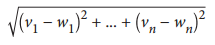

In [13]:
Image('img/C04_003.png', width=200)

In [14]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude([2, 5])

5.385164807134504

In [15]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

print vector_subtract([2, 5], [7, 1])
squared_distance([2, 5], [7, 1])

vector_subtract
v [2, 5]
w [7, 1]
[-5, 4]
vector_subtract
v [2, 5]
w [7, 1]


41

### distance: method1

In [16]:
def distance(v, w):
    return math.sqrt(squared_distance(v, w))

distance([2, 5], [7, 1])

vector_subtract
v [2, 5]
w [7, 1]


6.4031242374328485

### distance: method2

In [17]:
def distance(v, w):
    return magnitude(vector_subtract(v, w))

distance([2, 5], [7, 1])

vector_subtract
v [2, 5]
w [7, 1]


6.4031242374328485

# Matrices

#### Why matrices are important?

1. We can represent a data consisting of multiple vectors.
        Ex) heights, weights, age
        people = [[170, 70, 40],
                  [168, 50, 24],
                  [155, 48, 29],]
2. We can use an n * k matrix to represent a linear function that maps k-dimentional vectors to n-dimentional cevtors.

3. Matrices can be used to represent binary relationships.
        Ex) Friendships
        friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
                       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
                       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
                       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0]] # user 3

In [18]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

shape([[2, 5], 
       [7, 1]])

(2, 2)

In [19]:
def get_row(A, i):
    return A[i]

get_row([[2, 5], 
         [7, 1]], 1)

[7, 1]

In [20]:
def get_column(A, j):
    return [A_i[j] for A_i in A]

get_column([[2, 5], 
            [7, 1]], 1)

[5, 1]

In [21]:
def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(r, c) for c in range(num_cols)] for r in range(num_rows)]

def is_diagonal(r, c):
    return 1 if r == c else 0

identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [22]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
    
    num_rows, num_cols = shape(A)
    entry_fn = lambda r, c: A[r][c] + B[r][c]
    
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[1, 0],
     [0, 1]]

B = [[1, 2],
     [3, 4]]

matrix_add(A, B)

[[2, 2], [3, 5]]

In [28]:
v = [2, 1]
w = [math.sqrt(.25), math.sqrt(.75)]
c = dot(v, w)

vonw = scalar_multiply(c, w)
o = [0,0]

scalar_multiply
c 1.86602540378
v [0.5, 0.8660254037844386]


<IPython.core.display.Javascript object>


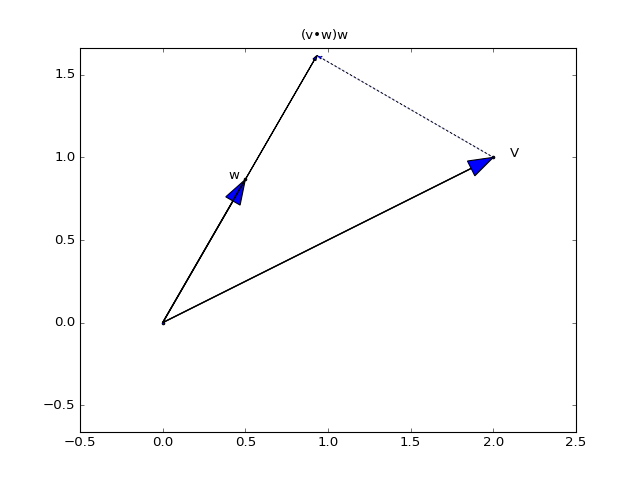

In [45]:
%matplotlib notebook

plt.arrow(x=0, y=0, dx=v[0], dy=v[1], width=0.002, head_width=.1, length_includes_head=True)
plt.arrow(x=0 ,y=0, dx=w[0], dy=w[1], width=0.002, head_width=.1, length_includes_head=True)
plt.arrow(x=0, y=0, dx=vonw[0], dy=vonw[1], length_includes_head=True)
plt.arrow(x=v[0], y=v[1], dx=vonw[0]-v[0], dy=vonw[1]-v[1], linestyle='dotted', length_includes_head=True)

plt.annotate('V', v, xytext=[v[0]+0.1, v[1]])
plt.annotate("w", w, xytext=[w[0]-0.1, w[1]])
plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0]-0.1, vonw[1]+0.1])

plt.scatter(*zip(v,w,o),marker='.')
plt.axis('equal')
plt.show()